In [1]:
import numpy as np
from mpmath import mp, mpf, sin, pi, fadd, fsub, fmul, fdiv
import matplotlib.pyplot as plt
from making_figures import analytical_solution, solve, plot

In [60]:
# calculate the max abs error for each courant number at a given bit depth
# returns list of errors for each courant number - max error throughout simulation

courant_numbers = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
max_errors = []

for number in courant_numbers:
    prec = 10
    L = 1000.0                  # Half-length of the domain in meters (standard float)
    c = 1000.0                    # Wave speed in m/s (standard float)
    N = 201 
    T = 10
    C = number
    solutions, errors = solve(prec, L, c, N, T, C)
    max_errors.append(max(errors))

max_errors

[0.06731645007718773,
 2.0078125,
 2.025390625,
 2.0078125,
 1.884319239966021,
 2.015625,
 2.02734375,
 2.015625,
 1.8534534947702004,
 2.048808385856137]

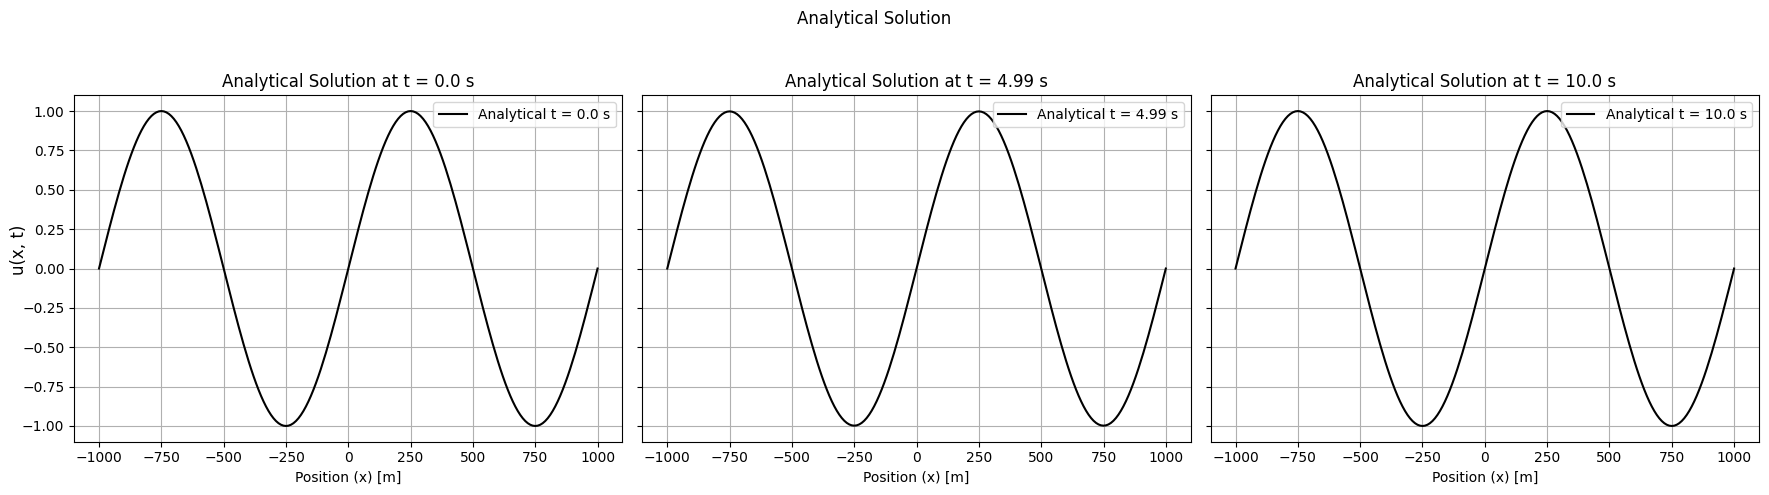

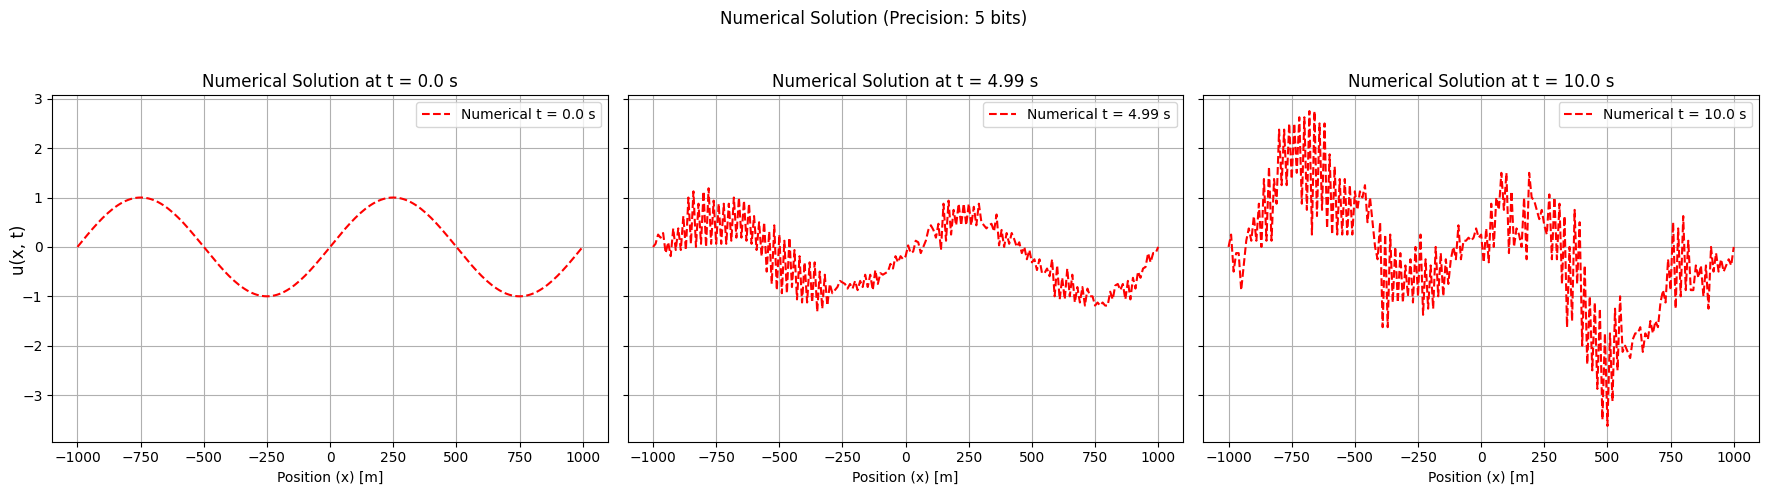

In [35]:
prec = 5
L = 1000.0                  # Half-length of the domain in meters (standard float)
c = 1000.0                    # Wave speed in m/s (standard float)
N = 201 
T = 10
C = 1
solutions, errors = solve(prec, L, c, N, T, C)
plot(solutions, L, c, N, T, C)

##### Effect of reducing bit depth at $C = 0.9$ unscaled

- **23 bits**: Period is shifted, solution is stable but out of phase with analytical solution at same point.
- **20 bits**: Period shift is preserved at same phase offset (quantify this?), solution still stable as expected.
- **17 bits**: Period shift is preserved at same phase offset, solution still stable as expected.
- **14 bits**: Period shift is preserved at same phase offset, solution still stable as expected.
- **13 bits**: Period shift is preserved at same phase offset, solution still stable as expected.
- **12 bits**: Period shift is preserved at same phase offset, solution still stable as expected.
- **10/11 bits**: Small perturbations/distortion after 10 periods becomes visible, initially around points of inflection but propagating down limbs.
- **9 bits**: Distortion clear around points of inflection after 5 periods, visible in all parts of the wave at 10 periods with stability beginning to slip on the second peak.
- **8 bits**: Distortion clear throughout first half of the waveform at 5 periods, after 10 periods it is significant throughout the waveform and beginning to display much higher frequencies around points of inflection.
- **7 bits**: Distortion throughout waveform after 5 periods with instability at the peaks and troughs, amplified after 10 periods.
- **6 bits**: After 5 periods the uncertainty appears to be ±0.25 (in a range $-1 < x < 1$). At 10 periods the wave has lost it's form and uncertanties are pushing towards ±0.5
- **5 bits**: After 5 periods the solutions resemble the shape of the intial condition but drop to -2 (100% outside the minimum value), at 10 periods the solution is completely unstable
- **4 bits**: Unstable at 5 periods with the majority of the solution below -5, at 10 periods it reaches -30 and +10 (range of 40 as opposed to 2) indicating complete instability as expected - note that this is different than for $C=1$ where the range is ~35

